In [143]:
import pandas as pd
import praw
import nltk
import numpy as np
from praw.models import MoreComments

In [154]:
def get_comments_on_subject(subject):
    topics_dict = { "name":[], "score":[] , "comms_num": [], "comments":[]}
    subreddit = reddit.subreddit('Music')
    posts = subreddit.search(subject , sort='top', limit=10)

    for submission in posts:
        topics_dict["name"].append(submission.title)
        topics_dict["score"].append(submission.score)
        topics_dict["comms_num"].append(submission.num_comments)
        text = ""
        if (submission.num_comments > 1):
            for comments in submission.comments[:submission.num_comments//1000]:
                if isinstance(comments, MoreComments):
                    continue
                reply = comments.body
                text = text + ',' + reply
            topics_dict["comments"].append(text)
        else:
            topics_dict["comments"].append(None)
    topics_data = pd.DataFrame(topics_dict)
    topics_data = topics_data.dropna()
    #filter = topics_data["comments"] != ""
    #topics_data = topics_data[filter]
    return topics_data

In [146]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [147]:
def sentiment_analysis(comments):
    nltk_results = [nltk_sentiment(row) for row in comments]
    results_df = pd.DataFrame(nltk_results)
    text_df = pd.DataFrame(comments, columns = ['text'])
    nltk_df = text_df.join(results_df)
    return nltk_df

In [ ]:
## Statistics 

In [148]:
def analyze_sentiments(subject):
    Data = get_comments_on_subject(subject)
    comments = np.array(Data['comments'])
    Sentiments = sentiment_analysis(comments)
    #neu = Sentiments['neu'].mean()
    if not Sentiments.empty:
        pos = Sentiments['pos'].mean()
    else:
        pos = 0
    #neg = Sentiments['neg'].mean()
    return pos

In [149]:
df = pd.read_csv("ao_titres_2018.csv", sep=',')
df.head()

,Unnamed: 0,Titre,Artiste,Peak,Peak date,Weeks intop ten
0,5,finesse,bruno-mars-and-cardi-b,3.0,January 20,14
1,6,filthy,justin-timberlake,9.0,January 20,1
2,7,new-rules,dua-lipa,6.0,February 17,5
3,8,gods-plan,drake,1.0,February 3,26
4,9,diplomatic-immunity,drake,7.0,February 3,1


In [150]:
df['Sentiment Titre'] = df["Titre"].apply(analyze_sentiments)


In [155]:
df['Sentiment Artiste'] = df["Artiste"].apply(analyze_sentiments)

In [183]:
df_new = df[df['Sentiment Titre']>0]
df_new = df_new[df_new['Sentiment Artiste']>0]
df_new.head()

,Unnamed: 0,Titre,Artiste,Peak,Peak date,Weeks intop ten,Sentiment Titre,Sentiment Artiste
9,18,sad,xxxtentacion,1.0,June 30,6,0.120143,0.032833
10,20,call-out-my-name,the-weeknd,4.0,April 14,1,0.051250,0.035500
11,22,nice-for-what,drake,1.0,April 21,17,0.213000,0.055000
19,30,better-now,post-malone,3.0,October 6,18,0.155429,0.006600
20,31,this-is-america,childish-gambino,1.0,May 19,5,0.060571,0.067100


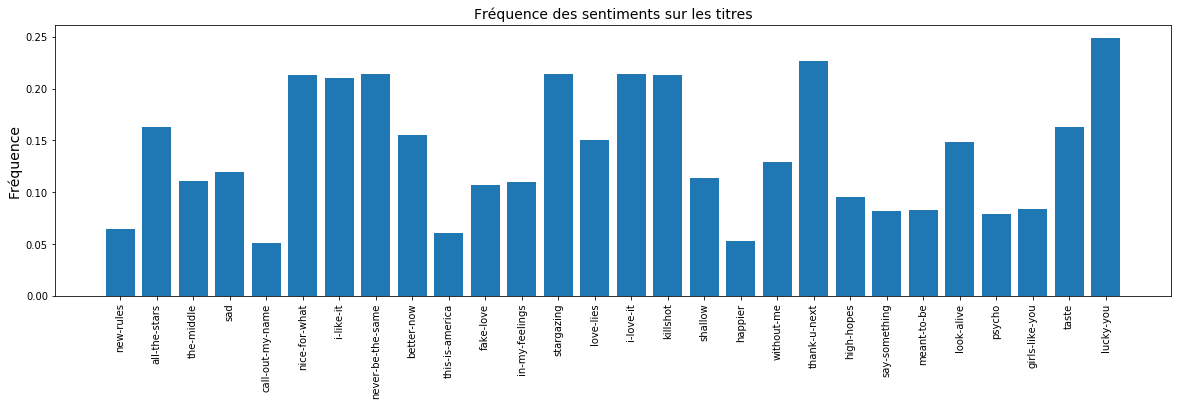

In [175]:
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure(figsize=(20, 5))
df_max_titre = df[df['Sentiment Titre']>0]
x_pos = np.arange(len(df_max_titre['Sentiment Titre']))
plt.bar( x_pos, df_max_titre['Sentiment Titre'])
plt.ylabel("Fréquence", fontsize=14)
plt.title("Fréquence des sentiments sur les titres",  fontsize=14)
plt.xticks(x_pos, df_max_titre['Titre'], rotation=90)
plt.show()

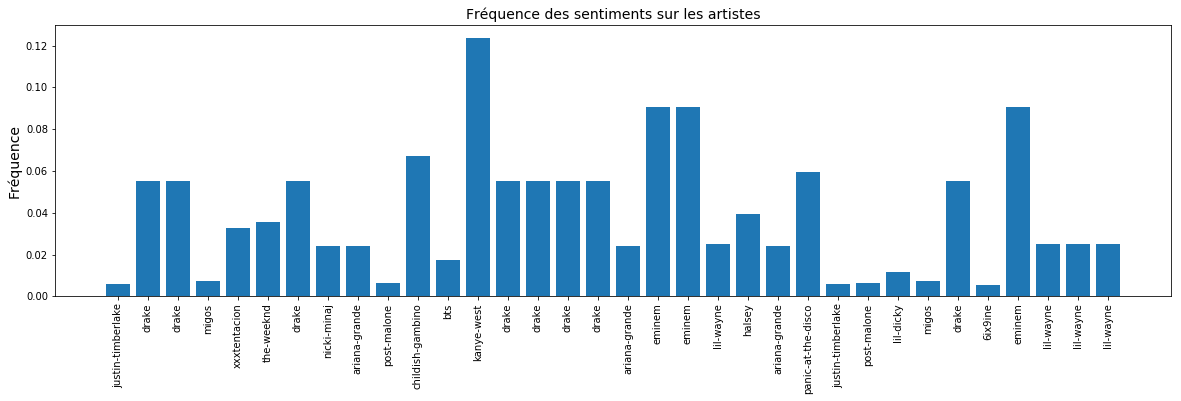

In [173]:
%matplotlib inline
fig = plt.figure(figsize=(20, 5))
df_max_artiste = df[df['Sentiment Artiste']>0]
x_pos = np.arange(len(df_max_artiste['Sentiment Artiste']))
plt.bar( x_pos, df_max_artiste['Sentiment Artiste'])
plt.ylabel("Fréquence", fontsize=14)
plt.title("Fréquence des sentiments sur les artistes",  fontsize=14)
plt.xticks(x_pos, df_max_artiste['Artiste'], rotation=90)
plt.show()